In [10]:
from miditoolkit.midi.parser import MidiFile
import os
from tqdm.notebook import tqdm
from collections import Counter
from deepnote import MusicRepr
from joblib import delayed, Parallel

In [16]:
path = '/home/soroosh/Desktop/datasets/music/lmd_processed/'
files = list(filter(lambda x: x.endswith('.mid'), os.listdir(path)))
len(files)

22945

In [17]:
def get_instruments(file):
    seq = MusicRepr.from_file(path + file)
    return seq.get_instruments()

res = Parallel(n_jobs=12)(delayed(get_instruments)(file) for file in tqdm(files))

  0%|          | 0/22945 [00:00<?, ?it/s]

In [19]:
c = Counter()
for r in res:
    c.update(r)
c

Counter({'piano': 16219,
         'guitar': 16556,
         'reed': 6303,
         'drums': 20577,
         'brass': 6947,
         'bass': 19417,
         'organ': 6006,
         'strings': 3961,
         'ensemble': 15951,
         'synth-pad': 5303,
         'percussion': 3840,
         'pipe': 5475,
         'synth-lead': 4349,
         'percussive': 2798,
         'synth-effects': 2656,
         'ethnic': 1233,
         'sound-effects': 1724})

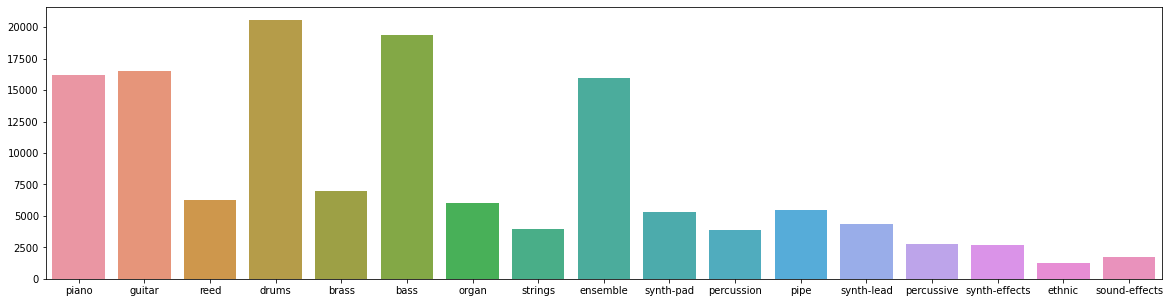

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20,5))
sns.barplot(x=list(c.keys()), y=list(c.values()))